In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping
from keras.regularizers import L1,L2
from tensorflow import keras

In [2]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=(1, 1),input_shape =(256,256,3),activation='relu'))
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(16,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(8,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Conv2D(8,kernel_size=(3,3),padding='same',strides=(1, 1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(1,1),padding='same'))

model.add(Flatten())

model.add(Dense(64,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.03))

model.add(Dense(32,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.02))

model.add(Dense(16,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.01))


model.add(Dense(8,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())

model.add(Dense(4,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())

model.add(Dense(2,activation='relu',kernel_regularizer=L1(l1=0.05)))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid',kernel_regularizer=L1(l1=0.05)))

/Users/pradyumnaswain/miniforge3/envs/tf_arm/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 256, 256, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 256, 256, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    33,554,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           52

 Total params: 33,584,673 (128.12 MB)

 Trainable params: 33,584,293 (128.11 MB)

 Non-trainable params: 380 (1.48 KB)

In [4]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/Users/pradyumnaswain/JU python/Practice/Sla practice/CNN2_project/Data/Train',
    labels="inferred",
    batch_size=16,
    image_size=(256, 256)
)

Found 3001 files belonging to 2 classes.


In [6]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/Users/pradyumnaswain/JU python/Practice/Sla practice/CNN2_project/Data/Test',
    labels="inferred",
    batch_size=16,
    image_size=(256, 256)
)

Found 1021 files belonging to 2 classes.


In [7]:
model.fit(train_ds,batch_size=10,epochs=50,callbacks=EarlyStopping(),validation_data=test_ds)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 189s 955ms/step - acc: 0.6173 - loss: 500.8466 - val_acc: 0.5201 - val_loss: 201.2987
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - acc: 0.5288 - loss: 196.1860 - val_acc: 0.4936 - val_loss: 191.1274
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - acc: 0.6267 - loss: 188.5537 - val_acc: 0.5681 - val_loss: 188.0102
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 183s 973ms/step - acc: 0.6326 - loss: 187.4908 - val_acc: 0.4936 - val_loss: 193.4843


In [8]:
model.get_weights()

[array([[[[ 0.02165851,  0.03722617,  0.09141129, ...,  0.04715856,
           -0.06044194,  0.06140339],
          [ 0.05837901, -0.01173521,  0.07217138, ...,  0.09699164,
           -0.0868668 ,  0.08832174],
          [ 0.02825858,  0.01287452,  0.02730739, ...,  0.03205148,
            0.04504413,  0.09156734]],
 
         [[-0.05138347, -0.05564963, -0.00606355, ..., -0.01097562,
            0.03952775, -0.08481154],
          [-0.0143609 , -0.06531017, -0.09389281, ..., -0.02469452,
           -0.07232457,  0.00835423],
          [-0.01292283,  0.01135667, -0.03130469, ...,  0.0390817 ,
            0.07359502, -0.0500315 ]],
 
         [[-0.04082613, -0.00263123, -0.08061073, ..., -0.06608222,
            0.01873097,  0.07030887],
          [ 0.03378385,  0.06104111, -0.00433217, ..., -0.05948188,
            0.05931586, -0.01597793],
          [ 0.03382564,  0.05479781, -0.06391294, ...,  0.02439651,
            0.09092663, -0.08893099]]],
 
 
        [[[ 0.0908986 , -0.0433088

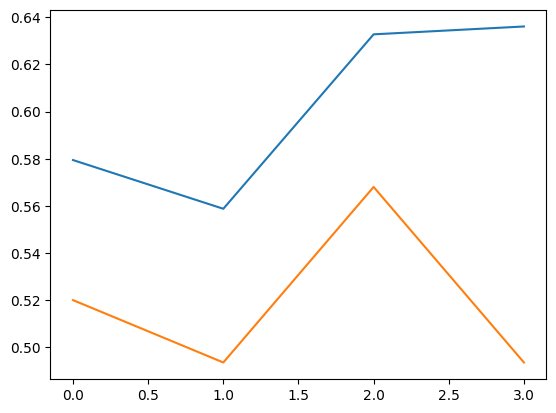

In [9]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])

In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread('/Users/pradyumnaswain/JU python/Practice/Sla practice/CNN2_project/Data/Test/Normal/Normal- (1501).jpg')

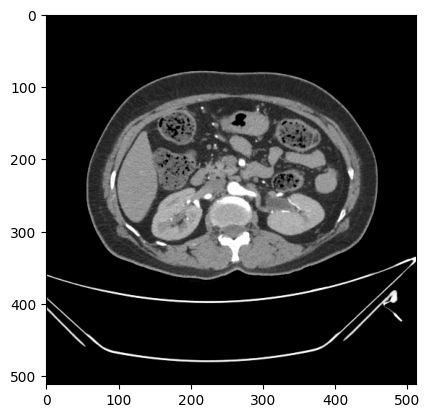

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
img1 = cv2.resize(img,(256,256))

In [14]:
img2 = img1.reshape((1,256,256,3))

In [15]:
if (model.predict(img2))>0.5:
    print('Normal')
else:
    print('Tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Normal
